# Logistic Regression for MNIST Digit Classification
In this notebook we will simply use logistic regression to classify the MNIST digits. No CNN and no fancy stuff. Let´s see how far we can get with this.

In [385]:
import numpy as np
import pandas as pd
import torch
import torchvision

## Data Preprocessing

### Data Import

In [386]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Cleaning
No Data Cleaning apllied here.

### Data Transformation

In [387]:
arr = df.to_numpy().astype(np.float32)
arr

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [7., 0., 0., ..., 0., 0., 0.],
       [6., 0., 0., ..., 0., 0., 0.],
       [9., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [388]:
dataset = torch.from_numpy(arr)
dataset

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [7., 0., 0.,  ..., 0., 0., 0.],
        [6., 0., 0.,  ..., 0., 0., 0.],
        [9., 0., 0.,  ..., 0., 0., 0.]])

Split inputs (images) and outputs (labels) to tuples with TensorDataset:

In [389]:
from torch.utils.data import TensorDataset

labels = []
for i in range(len(dataset)):
    labels.append(int(dataset[i][0]))
labels = torch.Tensor(labels).type(torch.LongTensor)

images = dataset.narrow(1, 1, 784)

print(images)
print(labels)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([1, 0, 1,  ..., 7, 6, 9])


In [390]:
dataset = TensorDataset(images, labels)
dataset

In [391]:
dataset[0]

(tensor([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         188., 255.,  94.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,  

In [392]:
imgID = 568

label = labels[imgID]
print(label)

image = torch.reshape(images[imgID], (28, 28))
print(image)

tensor(3)
tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.],
        [ 

### Data Visualization

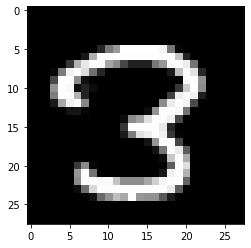

In [393]:
from matplotlib import pyplot as plt

plt.imshow(image, cmap='gray')    # Choose imgID in last cell, to visualize here

### Split Training Data into Train & Validation Set
In this competition 28000 images are already assigned to the **Test set**. From the 42000 images given as the **Training set** we will have to pick a small portion for **Validation**. Let´s pick 4000 for this.

In [394]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [38000, 4000])
len(train_ds), len(val_ds)

(38000, 4000)

### Databatch Loader

In [395]:
from torch.utils.data import DataLoader

batch_size = 100
train_dl = DataLoader(train_ds, batch_size, shuffle=True)
val_dl = DataLoader(val_ds, len(val_ds))    # Normally you DON'T choose batchsize=datasize! 
                                            # Normally you split into more than 1 batches.
                                            # So, don't try this at home lol

In [396]:
for xb, yb in train_dl:    # Test batches of train_dl or val_dl
    print(xb)
    print(yb)
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([7, 9, 0, 6, 8, 3, 3, 3, 3, 7, 1, 8, 0, 5, 6, 1, 8, 1, 9, 4, 5, 0, 8, 8,
        0, 0, 7, 4, 5, 9, 4, 5, 8, 3, 1, 8, 1, 3, 7, 0, 7, 9, 5, 8, 9, 7, 9, 5,
        1, 5, 8, 9, 5, 6, 4, 2, 8, 1, 9, 9, 6, 1, 6, 9, 0, 5, 8, 9, 6, 3, 8, 9,
        0, 1, 2, 4, 2, 4, 9, 9, 5, 0, 8, 5, 0, 4, 2, 6, 3, 2, 1, 4, 6, 0, 1, 9,
        2, 1, 0, 6])


## Logistic Regression Model

In [397]:
import torch.nn as nn

input_size = 784    # 28*28
num_classes = 10    # {0,1,...,9}

model = nn.Linear(input_size, num_classes)

In [398]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0088, -0.0099, -0.0008,  ..., -0.0042,  0.0068, -0.0136],
        [ 0.0334,  0.0277,  0.0018,  ..., -0.0103,  0.0172, -0.0151],
        [ 0.0161, -0.0120,  0.0211,  ..., -0.0338, -0.0293, -0.0299],
        ...,
        [ 0.0340,  0.0140,  0.0255,  ..., -0.0096, -0.0058,  0.0083],
        [ 0.0193,  0.0348,  0.0226,  ..., -0.0104,  0.0021,  0.0263],
        [-0.0300,  0.0210, -0.0176,  ...,  0.0132, -0.0177, -0.0317]],
       requires_grad=True)


In [399]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([ 0.0089, -0.0011,  0.0232,  0.0144,  0.0131,  0.0048, -0.0102, -0.0017,
         0.0107, -0.0036], requires_grad=True)


In [400]:
for xb, yb in train_dl:
    print(xb)
    print(yb)
    break

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([0, 4, 1, 2, 8, 5, 9, 9, 8, 1, 6, 0, 1, 7, 2, 5, 9, 3, 0, 0, 1, 0, 9, 2,
        1, 9, 0, 8, 2, 3, 4, 5, 8, 5, 5, 9, 8, 3, 6, 1, 4, 2, 8, 5, 2, 6, 7, 6,
        9, 7, 8, 6, 5, 1, 1, 5, 6, 0, 2, 9, 9, 1, 4, 4, 4, 1, 6, 0, 2, 6, 1, 3,
        5, 3, 9, 2, 7, 6, 8, 0, 3, 1, 2, 5, 7, 1, 9, 0, 9, 9, 5, 1, 7, 8, 1, 5,
        0, 3, 6, 7])


In [401]:
for images, labels in train_dl:
    outputs = model(images)
    break

print('batch 1:')
print('outputs.shape : ', outputs.shape)
print('Outputs:\n', outputs.data)

batch 1:
outputs.shape :  torch.Size([100, 10])
Outputs:
 tensor([[ 3.0583e+01,  6.3276e+01, -5.9252e+01, -4.0008e+01, -5.6348e+01,
          2.1429e+01,  1.8356e+01,  2.1566e+01, -1.2454e+01,  6.1978e+01],
        [ 1.7372e+01, -6.6730e+01,  1.7291e+01, -5.4290e+01, -8.8736e+01,
          3.8537e+01, -1.3398e+01, -7.7263e+01, -4.2544e+00, -2.1078e+01],
        [ 7.5221e+01, -8.7835e+00,  2.5598e+00,  6.8949e+01, -1.8451e+01,
          3.9535e+01, -3.2283e+01,  1.4208e+01,  1.4888e+01,  9.2762e+00],
        [ 1.0720e+02,  7.2937e+01, -1.8735e+01, -1.6252e+01, -1.6460e+02,
         -3.4076e+01,  5.2533e+01,  5.4625e+00, -4.2064e+00,  5.3450e+01],
        [ 1.1970e+01,  1.2765e+01, -2.2987e+01, -4.6174e+01, -7.1285e-01,
          1.0936e+01, -2.7630e+01, -3.2631e+01, -2.7598e+01, -2.3636e+01],
        [ 2.6443e+00,  3.8717e+01, -6.8147e+01,  3.2753e+01, -1.7070e+01,
          7.1773e+01, -6.5645e-01, -5.9131e+00, -1.1775e+01, -5.0533e+01],
        [ 6.6894e+00,  5.6143e+01,  8.0827e+00, 

Apply Softmax to convert ouputs to probabilities:

In [402]:
import torch.nn.functional as F

In [403]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

print('batch 1:')
print('Outputs:\n', probs.data)
print('Sum of one row:', sum(probs[0]).item())

batch 1:
Outputs:
 tensor([[4.9721e-15, 7.8556e-01, 0.0000e+00, 1.4013e-45, 0.0000e+00, 5.2601e-19,
         2.4350e-20, 6.0334e-19, 1.0140e-33, 2.1444e-01],
        [6.4313e-10, 0.0000e+00, 5.9346e-10, 4.8520e-41, 0.0000e+00, 1.0000e+00,
         2.7859e-23, 0.0000e+00, 2.6071e-19, 1.2871e-26],
        [9.9811e-01, 3.2850e-37, 2.7725e-32, 1.8852e-03, 2.0801e-41, 3.1699e-16,
         0.0000e+00, 3.1739e-27, 6.2636e-27, 2.2896e-29],
        [1.0000e+00, 1.3129e-15, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.8070e-24, 7.0065e-45, 0.0000e+00, 4.5215e-24],
        [2.8007e-01, 6.2027e-01, 1.8441e-16, 1.5702e-26, 8.6961e-07, 9.9656e-02,
         1.7753e-18, 1.1951e-20, 1.8328e-18, 9.6348e-17],
        [9.5037e-31, 4.4083e-15, 0.0000e+00, 1.1324e-17, 2.6072e-39, 1.0000e+00,
         3.5026e-32, 1.8258e-34, 5.1948e-37, 0.0000e+00],
        [6.5335e-26, 1.9606e-04, 2.6320e-25, 1.2066e-38, 0.0000e+00, 2.4511e-05,
         4.6124e-04, 1.4292e-36, 2.6431e-39, 9.9932e-01],
        

In [404]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([1, 5, 0, 0, 1, 5, 9, 9, 0, 3, 5, 8, 0, 6, 5, 0, 0, 5, 5, 0, 0, 0, 0, 5,
        7, 0, 1, 0, 5, 7, 5, 5, 0, 7, 5, 5, 8, 0, 5, 1, 9, 0, 0, 0, 1, 8, 5, 0,
        0, 0, 0, 1, 7, 0, 5, 9, 8, 9, 9, 9, 5, 0, 5, 1, 5, 5, 0, 3, 3, 0, 3, 1,
        0, 1, 5, 1, 8, 0, 0, 0, 1, 0, 5, 5, 5, 1, 7, 3, 7, 0, 9, 1, 0, 9, 0, 0,
        7, 5, 9, 0])
tensor([0.7856, 1.0000, 0.9981, 1.0000, 0.6203, 1.0000, 0.9993, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 0.9993, 1.0000, 1.0000, 1.0000, 0.9874, 1.0000, 0.9992,
        1.0000, 0.9998, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 0.9998, 1.0000, 1.0000, 1.0000, 1.0000,
        0.9999, 1.0000, 1.0000, 0.9999, 1.0000, 0.9974, 0.9311, 1.0000, 1.0000,
        1.0000, 1.0000, 0.7948, 1.0000, 1.0000, 1.0000, 0.5538, 1.0000, 0.9999,
        0.9997, 0.9951, 1.0000, 0.8793, 0.9084, 0.9847, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0

## Loss Function: Cross Entropy

$$ D(\hat{\mathbf y}, \mathbf y) = - \sum_j y_j \ln[\hat y] $$

Example:

$
\mathbf y =
\begin{bmatrix}
0\\ 
1\\ 
0\\ 
0
\end{bmatrix}
$

$
\hat{\mathbf y} =
\begin{bmatrix}
0.18\\ 
0.41\\ 
0.16\\ 
0.25
\end{bmatrix}
$

$
D(\hat{\mathbf y}, \mathbf y) = -(0*\ln[0.18] + 1*\ln[0.41] + 0*\ln[0.16] + 0*\ln[0.25]) = - \ln[0.41]
$

PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [405]:
loss_fn = F.cross_entropy

In [406]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
loss

tensor(66.9670, grad_fn=<NllLossBackward>)

## Evaluation Metric

In [407]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return float(torch.sum(preds == labels) / float(len(preds)))

In [408]:
# test accuracy
accuracy(
        torch.tensor([[0.0000e+00, 3.2972e-27, 8.5308e-22, 1.0000e+00, 0.0000e+00, 4.1089e-36,
                     2.5768e-15, 1.0142e-23, 1.7163e-16, 0.0000e+00],
                    [7.8614e-34, 4.0738e-30, 5.5259e-13, 4.1027e-17, 8.0373e-31, 1.1074e-26,
                     9.0269e-01, 1.5159e-09, 9.7312e-02, 7.3484e-36],
                    [7.2744e-38, 1.9258e-20, 1.0000e+00, 1.5459e-20, 6.1245e-37, 3.6680e-15,
                     1.2950e-27, 2.5952e-12, 3.5957e-27, 2.1079e-39]]),
        torch.tensor([3., 6, 4])
                    )# 3,6,2 are the correct labels

0.6666666865348816

## Optimizer

In [409]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

## Training

In [410]:
def fit(epochs, model, train_dl, optimizer):
    history = []
    
    # Initial Validation
    for xv, yv in val_dl:
        preds_val = model(xv)
        acc = accuracy(preds_val, yv)
        history.append(acc)
        break
    print('Epoch 0: {}'.format(acc))
    
    for epoch in range(epochs):
        
        # Training
        for xb, yb in train_dl:
            preds = model(xb)
            loss = loss_fn(preds, yb)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        # Validation
        for xv, yv in val_dl:
            preds_val = model(xv)
            acc = accuracy(preds_val, yv)
            history.append(acc)
            break
            
        if (epoch+1) % 5 == 0 or (epoch+1) in range(1, 5):
            print('Epoch {}: {}'.format(epoch+1, acc))
            
    return history

In [411]:
epochs = 25
history = fit(epochs, model, train_dl, opt)

Epoch 0: 0.0794999971985817
Epoch 1: 0.7105000019073486
Epoch 2: 0.7817500233650208
Epoch 3: 0.8075000047683716
Epoch 4: 0.8242499828338623
Epoch 5: 0.8352500200271606
Epoch 10: 0.8522499799728394
Epoch 15: 0.8627499938011169
Epoch 20: 0.8667500019073486
Epoch 25: 0.8677499890327454


## Result

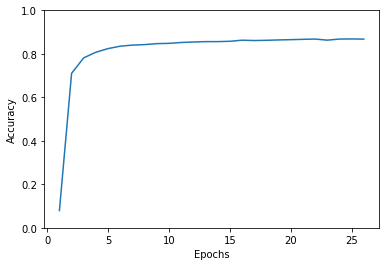

In [412]:
plt.plot(np.arange(1, epochs+2), history)
plt.gca().set_ylim(top=1, bottom=0)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

We are getting close to 90% accuracy with logistic regression, which is fine considering the low effort.